<a href="https://colab.research.google.com/github/popa13/MAP1003/blob/main/6_Interpolation-activite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

L'objectif est d'implémenter quelques algorithmes des notes de cours du chapitre 6. Nous allons implémenter

*   La table des différences divisées pour une liste de points données.
*   L'interpolation de Newton
*   La méthode de Thomas pour résoudre des systèmes tridiagonaux.


À chaque étape, nous allons valider que le code est valide en le testant sur certains exemples.

Pour manipuler les matrices, nous allons utiliser la paquet numpy. On l'importe donc comme ceci.

In [1]:
import numpy as np

# Table des différences divisées

D'après la définition, la énième différence divisée d'une fonction est

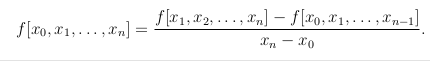

Nous allons maintenant construire le tableau des différences divisées. Veuillez compléter le code suivant.


In [2]:
def differences_divisees(x,y):
  # On enregistre le nombre de points d'interpollation
  n = len(y)

  # On initialise la table des differences divisees
  diff_div = np.zeros([n,n])

  # On initialise la premiere colonne du tableau comme etant y
  diff_div[:,0] = y

  # On construit maintenant le tableau
  for j in range(1, n):
    for i in range(n - j):
      diff_div[i,j] = (diff_div[i+1,j-1] - diff_div[i,j-1]) / (x[i+j] - x[i])

  return diff_div


## Exemple 6.6
Nous allons construire la table de différences divisées obtenue dans l'exemple 6.6 des notes de cours.

In [5]:
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 9, 28])

dd_table = differences_divisees(x,y)

Nous allons maintenant afficher la table. Gemini nous a concocté une petite fonction pour réaliser cet affichage.

In [11]:
import pandas as pd

def afficher_table_differences(x, coef):
    """
    Affiche le tableau des différences divisées dans un style
    similaire aux notes de cours (disposition en quinconce).
    """
    n = len(x)
    # On crée une table avec 2n-1 lignes pour permettre l'affichage décalé
    # (une ligne pour la valeur, une ligne pour la différence en dessous)
    display_table = np.full((2 * n - 1, n + 1), "", dtype=object)

    # Remplissage du tableau d'affichage
    for i in range(n):
        # Colonne des xi
        display_table[2 * i, 0] = x[i]
        # Colonnes des différences
        for j in range(n - i):
            # On décale la ligne de +j pour créer l'effet visuel de descente
            display_table[2 * i + j, j + 1] = f"{coef[i, j]:g}"

    # Création des noms de colonnes (LaTeX)
    columns = ["xi", "f(xi)"]
    for k in range(1, n):
        columns.append(f"f[x_i...x_{{i+{k}}}]")

    # Conversion en DataFrame Pandas pour un bel affichage dans Colab
    df = pd.DataFrame(display_table, columns=columns)
    return df

# --- TEST AVEC VOS DONNÉES ---
x_test = [0, 1, 2, 3]
y_test = [1, 2, 9, 28]

dd_rendu = afficher_table_differences(x, dd_table)
# On remplace les chaînes vides par None pour que Pandas n'affiche rien
dd_rendu

,xi,f(xi),f[x_i...x_{i+1}],f[x_i...x_{i+2}],f[x_i...x_{i+3}]
0,0,1,,,
1,,,1,,
2,1,2,,3,
3,,,7,,1
4,2,9,,6,
5,,,19,,
6,3,28,,,


## Exemple 6.7
On va maintenant calculer la table des différences divisées de l'exemple 6.7. Ceci permettra de valider les résultats obtenus dans les notes de cours.

In [13]:
# Définissez les abscisses d'interpolation
x = np.array([0,1,2,3,5])
# Définissez les ordonnées des points d'interolation
y = np.array([1, 2, 9, 28, 6])

In [14]:
# Generer la table des differences divisee
dd_table = differences_divisees(x,y)
dd_rendu = afficher_table_differences(x, dd_table)
dd_rendu

,xi,f(xi),f[x_i...x_{i+1}],f[x_i...x_{i+2}],f[x_i...x_{i+3}],f[x_i...x_{i+4}]
0,0,1,,,,
1,,,1,,,
2,1,2,,3,,
3,,,7,,1,
4,2,9,,6,,-1
5,,,19,,-4,
6,3,28,,-10,,
7,,,-11,,,
8,5,6,,,,


# Schéma de Horner
Avant de définir la fonction pour déterminer le polynôme d'interpolation de Newton passant par les n + 1 points d'interpolation, on définit la fonction qui permet d'évaluer un polynôme de manière efficace.

Veuillez compléter le code suivant de la fonction *schema_horner_newton*. Après avoir ajouter le code demandé, assurez-vous d'effacer les commande **pass**.

In [24]:
def schema_horner_newton(coef, x_data, x_eval):
  n = len(coef) - 1
  # Initialiser p
  p = coef[n]
  for i in range(n-1, -1, -1):
    # appliquer la formule de la ligne 5 de l'algorithme 6.2 en remplacant x and x - x_i
    p = coef[i] + (x_eval - x_data[i]) * p
  return p

## Exemple 6.6
Nous allons tester si la méthode d'évaluation par le schéma de Horner fonctionne bien.

In [20]:
# On génère les differences divisee a nouveau pour l'exemple 6.6
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 9, 28])

dd_table = differences_divisees(x,y)
coef = dd_table[0,:]

# On affiche les coefficients pour validation
print(coef)

[1. 1. 3. 1.]


In [25]:
# Utiliser la fonction schema_horner_newton pour evaluer
# le polynome d'interpolation de Newton en x_value = 1.5
x_value = 1.5
p = schema_horner_newton(coef, x, x_value)
print(p)

4.375


On va maintenant utiliser matplotlib pour afficher le graphe du polynôme d'interpolation de Newton.

On appelle d'abord un sous-paque de matplotlib, nommé pyplot.

In [30]:
import matplotlib.pyplot as plt

L'affiche se fait sur un échantillon de point entre la valeur minimale et la valeur maximale des abscisses d'interpolation de l'exemple 6.6. On pose alors ceci.

In [42]:
xmin, xmax = np.min(x), np.max(x)
x_values = np.linspace(xmin-1, xmax+1, 200)

On évalue le polynôme de Newton sur l'intervalle [xmin, xmax] aux échantillons x_values.

In [43]:
y_interp = np.array([schema_horner_newton(coef, x, x_value) for x_value in x_values])

Enfin, on trace le graphe du polynôme d'interpolation de Newton.

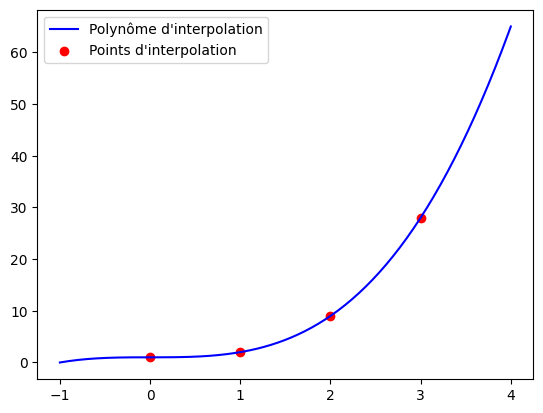

In [44]:
plt.plot(x_values, y_interp, color="blue", label="Polynôme d'interpolation")
plt.scatter(x, y, color="red", label="Points d'interpolation")
plt.legend()
plt.show()

## Exemple 6.9
Reproduisez les résultats de l'exemple 6.9. Pour se faire, définissez, dans une cellule de code ci-dessous, les éléments suviants:


*   Les points d'interpolation dans un vecteur t et un vecteur v.
*   La table des différences divisees et les coefficients pour le polynôme d'interpolation de Newton.
*   La figure du polynôme d'interpolation de Newton et les points d'interpolation.



In [47]:
# t =
# v =

# Generer la table des differences divisees

# Aller chercher les coefficients du polynome d'interpolation de Newton dans
# la table des differences divisees

# Tracer le graphe en vous inspirant du code de l'exemple précédent